/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning: overflow encountered in exp
  aux = np.exp(h_planck * c_light / k_bol / wavelength / temp)


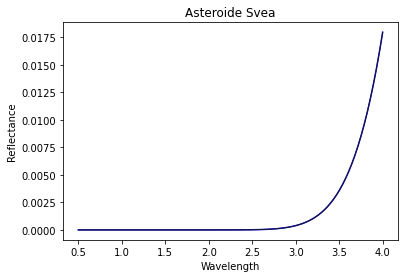

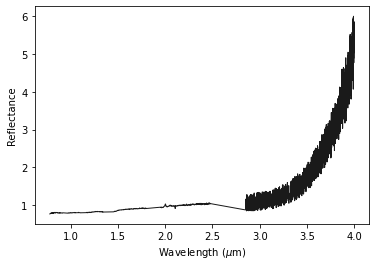

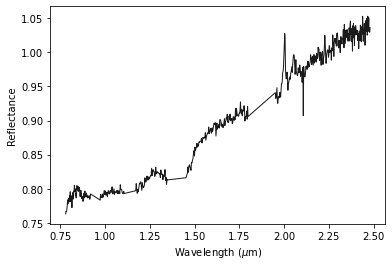

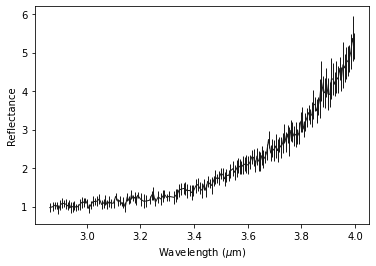

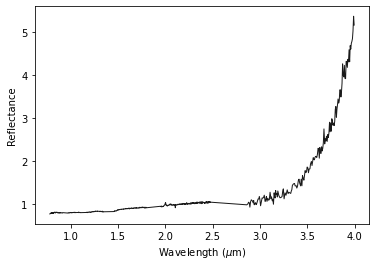

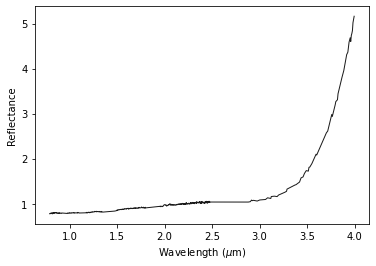

In [1]:
import cana
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from cana.datasets import getspectrum
import numpy 
import numpy as np


r = 2.42
delta = 1.86

x = cana.NEATM(r, delta, phase_angle=22.26, eta=0.9, epsilon=0.9, G=0.15)

distancia_do_sol = 2.42
distancia_da_terra = 1.86
albedo = 0.039
diametro = 81.057

m = cana.NEATM(distancia_do_sol, distancia_da_terra)
wave = np.linspace(0.5, 4.0, 100)

thermal_spec = m.flux(albedo, diametro, wavelengths=wave)
thermal_spec.plot()


matplotlib.pyplot.title("Asteroide Svea")

matplotlib.pyplot.xlabel("Wavelength")
matplotlib.pyplot.ylabel("Reflectance")

plt.plot(thermal_spec.w, thermal_spec.r,"blue",lw=1.5,linestyle="solid")



spec = cana.loadspec('/home/camila/Desktop/TCC/GitHub/README.rst/svea-spec-dados.py')

spec = spec.mask_region(region=[2.55,2.85])

spec = spec.trim(0.7,4.0) 

spec = spec.clean_spec()

aux = np.where(spec.w < 2.555)[0] 
spec_ir1 = spec[aux] 

spec_ir1 = spec.trim(0.78,2.48) 

spec_ir1 = spec.trim(0.78,2.48) 
spec_ir1 = spec_ir1.mask_region(region=[[0.92,0.97],[1.11,1.17],[1.35,1.45],[1.80,1.95]]) 

aux = np.where(spec.w > 2.555)[0] 
spec_ir2 = spec[aux] 

specnew = cana.stack_spec([spec_ir1, spec_ir2])
specnew.plot()

aux = np.where(specnew.w < 2.555)[0] 
spec1 = specnew[aux] 
spec1.plot()

aux = np.where(specnew.w > 2.555)[0] 
spec2 = specnew[aux] 

spec2_rebin = spec2.rebin()
spec2_rebin.plot()

specnovo = cana.stack_spec([spec1, spec2_rebin])
specnovo.plot()

specnovo_clean = specnovo.clean_spec()
specnovo_clean.plot()



/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning: overflow encountered in exp
  aux = np.exp(h_planck * c_light / k_bol / wavelength / temp)


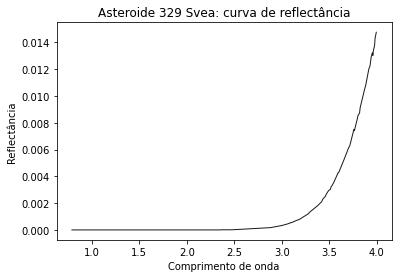

In [2]:
import cana
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from cana.datasets import getspectrum

svea = cana.loadspec("svea_corr.txt")
svea.plot()


def func(wave, albedo, eta):
    phi = np.radians(22.26) #angulo de fase
    distancia_do_sol = 2.42
    distancia_da_terra = 1.86
    m = cana.NEATM(distancia_do_sol, distancia_da_terra, phi, eta)
    magnitude_absoluta = 9.66
    diametro = (1329/np.sqrt(albedo))*(10**(-0.2*magnitude_absoluta))
    thermal_spec = m.flux(albedo, diametro, wavelengths=wave)
    return thermal_spec.r

plt.title("Asteroide 329 Svea: curva de reflectância")
plt.xlabel("Comprimento de onda")
plt.ylabel("Reflectância")
alpha = optimize.curve_fit(func, xdata = svea.w, ydata = svea.r, p0=None, sigma=None, absolute_sigma=False, check_finite=True, bounds=[[0,0.8],[1,1.2]], method="trf", jac=None)

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning: overflow encountered in exp
  aux = np.exp(h_planck * c_light / k_bol / wavelength / temp)


<Figure size 1800x1224 with 0 Axes>

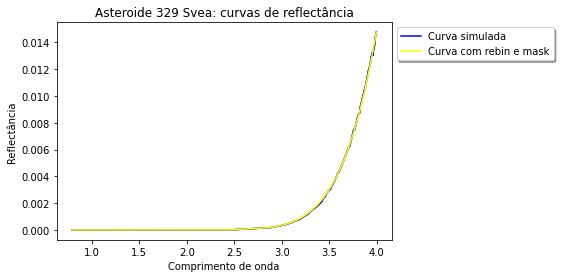

<Figure size 1800x1224 with 0 Axes>

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import numpy as np

matplotlib.pyplot.title("Asteroide 329 Svea: curvas de reflectância")

matplotlib.pyplot.xlabel("Comprimento de onda")
matplotlib.pyplot.ylabel("Reflectância")

plt.plot(svea.w, svea.r,"blue", lw=1.5,linestyle="solid")
specnovo_clean = func(svea.w, alpha[0][0], alpha[0][1])
plt.plot(svea.w, specnovo_clean, "yellow", lw=1.5,linestyle="solid")

plt.legend(["Curva simulada", "Curva com rebin e mask"], 
           loc = "upper left", bbox_to_anchor=(1, 1), shadow = True)

plt.plot(svea.w, svea.r,"blue", lw=1.5,linestyle="solid")
plt.plot(svea.w, specnovo_clean, "yellow", lw=1.5,linestyle="solid")


plt.figure(figsize=(25, 17))

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning: overflow encountered in exp
  aux = np.exp(h_planck * c_light / k_bol / wavelength / temp)


<Figure size 1800x1224 with 0 Axes>

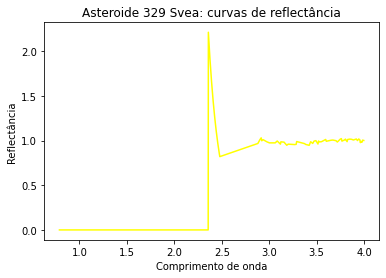

<Figure size 1800x1224 with 0 Axes>

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import numpy as np

matplotlib.pyplot.title("Asteroide 329 Svea: curvas de reflectância")

matplotlib.pyplot.xlabel("Comprimento de onda")
matplotlib.pyplot.ylabel("Reflectância")

specnovo_clean = func(svea.w, alpha[0][0], alpha[0][1])
plt.plot(svea.w, svea.r/specnovo_clean, "yellow", lw=1.5,linestyle="solid")

#plt.legend(["Curva simulada", "Curva com o rebin e mask"], 
#           loc = "upper left", bbox_to_anchor=(1, 1), shadow = True)


plt.figure(figsize=(25, 17))

/home/camila/.local/lib/python3.6/site-packages/cana/thermal/models.py:32: RuntimeWarning: overflow encountered in exp
  aux = np.exp(h_planck * c_light / k_bol / wavelength / temp)
/home/camila/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


<Figure size 1800x1224 with 0 Axes>

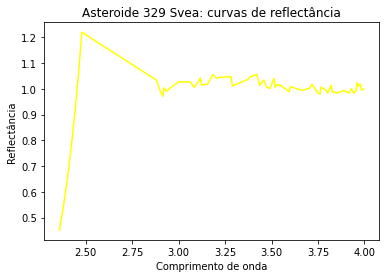

<Figure size 1800x1224 with 0 Axes>

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy 
import numpy as np

matplotlib.pyplot.title("Asteroide 329 Svea: curvas de reflectância")

matplotlib.pyplot.xlabel("Comprimento de onda")
matplotlib.pyplot.ylabel("Reflectância")

specnovo_clean = func(svea.w, alpha[0][0], alpha[0][1])
plt.plot(svea.w, specnovo_clean/svea.r, "yellow", lw=1.5,linestyle="solid")

#plt.legend(["Curva simulada", "Curva com o rebin e mask"], 
#           loc = "upper left", bbox_to_anchor=(1, 1), shadow = True)


plt.figure(figsize=(25, 17))